In [1]:
!pip install missingno

In [2]:
# Library
import pandas as pd
import numpy as np
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno
from IPython.display import display

# Model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping


# Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# System Recommendation Movies

Created by Christianto Kurniawan Priyono

# Project Overview

Peluncuran berbagai platform streaming dan lonjakan produksi film telah menghasilkan kondisi di mana para penonton memiliki akses tak terbatas terhadap ribuan film yang beragam. Kesenjangan antara berbagai pilihan film dan waktu yang terbatas membuat proyek rekomendasi film menjadi semakin penting. Melalui penerapan algoritma canggih dan analisis data, rekomendasi film memiliki kemampuan untuk menyaring dan menyesuaikan rekomendasi film-film tertentu dengan preferensi unik setiap penonton. Dengan demikian, proyek ini memiliki potensi untuk meningkatkan kepuasan penonton, memungkinkan eksplorasi genre atau film yang belum pernah dipikirkan sebelumnya, serta memperkaya pengalaman menonton film di era digital yang semakin berkembang. Dengan fokus pada solusi ini, kita dapat menghadirkan pengalaman menonton yang lebih bermakna, menghemat waktu penonton dalam mencari film yang sesuai dengan selera mereka, dan pada akhirnya, memperkaya pengalaman sinema secara keseluruhan.

# Business Understanding

## Problem Statement

Dalam upaya untuk memaksimalkan penjualan dan pengalaman penonton di platform streaming, akan dikembangkan sistem rekomendasi film untuk mengatasi permasalahan berikut: <br>
- Bagaimana menciptakan sistem rekomendasi film yang dapat dipersonalisasi dengan menggunakan teknik collaborative filtering dan content-based filtering berdasarkan preferensi dan perilaku penonton?
- Bagaimana cara mengukur keberhasilan sistem rekomendasi film dalam meningkatkan interaksi dengan penonton dan pada saat yang sama meningkatkan penjualan dan konsumsi film?

## Goals

Untuk menjawab pertanyaan tersebut, dibuat sistem rekomendasi dengan tujuan atau goals sebagai berikut:
- Mengembangkan sistem rekomendasi film yang mampu menyajikan rekomendasi yang sangat personal kepada penonton berdasarkan preferensi dan perilaku mereka.
- Meningkatkan kepuasan penonton dengan memberikan rekomendasi yang akurat dan bermanfaat, yang pada gilirannya dapat meningkatkan loyalitas penonton terhadap platform streaming.
- Meningkatkan akurasi rekomendasi dengan menggunakan metode deep learning yang dapat menghasilkan skor RMSE yang rendah. Root Mean Square Error (RMSE) adalah metrik yang mengukur seberapa dekat rekomendasi dengan rating yang diberikan oleh pengguna. Semakin rendah skor RMSE semakin akurat rekomendasi

## Solution Approach

Berikut langkah-langkah yang bisa dilakukan untuk mencapai tujuan diatas:
- **Pengumpulan Data** mengumpulkan data tentang preferensi dan perilaku penonton.
- ***Preprocessing Data*** membersihkan, mengorganisasi dan mengolah data agar dapat digunakan dalam permodelan.
- ***Permodelan Content-Based Filtering*** membangun model ini untuk memahami karakteristik film dan menghubungkannya dengan preferensi penonton berdasarkan konten, seperti genre, sutradara, aktor, dan tema.
- ***Permodelan Collaborative Filtering*** membangun model ini untuk mengidentifikasi pola dan preferensi berdasarkan perilaku sejenis penonton.

Dengan mengikuti pendekatan ini, diharapkan sistem rekomendasi film dapat memberikan hasil yang optimal sesuai dengan goals yang telah ditetapkan.

# Data Understanding

Data source https://www.kaggle.com/datasets/sunilgautam/movielens


Pada sumber dataset tersebut memiliki 4 file data, yaitu:
- links.csv,
- movies.csv,
- ratings.csv,
- tags.csv

Dari keempat file tersebut, yang akan digunakan adalah file movies.csv dan ratings.csv

## Attribute Information

***movies.csv***

| Attribute        | Data Type        | Description  |
|------------------|-------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| movieId        | int | Id film
| title          | object | Judul film
| genres         | object | Jenis / Tipe film

In [4]:
# Load Dataset
dfMovies = pd.read_csv('/content/drive/MyDrive/Portfolio/machine_learning/dicoding_submission_recommendation_system/movies.csv')
dfMovies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
# Mengetahui info tentang dataset
dfMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [6]:
# Mengecek jumlah baris dan kolom dataset
dfMovies.shape

(9742, 3)

Dari data diatas, dapat diketahui bahwa dataset mepunyai 9742 baris dan 3 kolom.

***ratings.csv***

| Attribute        | Data Type        | Description  |
|------------------|-------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| userId         | int | Id user
| movieId        | int | id film
| rating         | float | Jenis / Tipe film
| timestamp      | int | Waktu rating terekam

In [7]:
# Load Dataset
dfRatings = pd.read_csv('/content/drive/MyDrive/Portfolio/machine_learning/dicoding_submission_recommendation_system/ratings.csv')
dfRatings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
# Mengetahui info tentang dataset
dfRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [9]:
# Mengecek jumlah baris dan kolom dataset
dfRatings.shape

(100836, 4)

Dari data diatas, dapat diketahui bahwa dataset mepunyai 100836 baris dan 4 kolom.

# Exploratory Data Analysis

## Checking Unique Values

Tujuan dari langkah ini adalah untuk mengidentifikasi dan memahami variasi nilai yang ada dalam satu set data.

***movies.csv***

In [10]:
# Checking Value Dataset
listItem = []
for col in dfMovies.columns:
    listItem.append([col, dfMovies[col].dtype, dfMovies[col].isna().sum(), round((dfMovies[col].isna().sum() / len(dfMovies[col])) * 100, 2),
                     dfMovies[col].nunique(), list(dfMovies[col].unique())])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,movieId,int64,0,0.0,9742,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,title,object,0,0.0,9737,"[Toy Story (1995), Jumanji (1995), Grumpier Ol..."
2,genres,object,0,0.0,951,"[Adventure|Animation|Children|Comedy|Fantasy, ..."


Pada kolom diatas, dapat dilihat bahwa terdapat 9742 data unik pada kolom movieId, 9737 data unik pada kolom title, dan 951 data unik pada kolom genres. Selain itu, dataset *movies.csv* tidak mengandung missing value.

***ratings.csv***

In [11]:
# Checking Value Dataset
listItem = []
for col in dfRatings.columns:
    listItem.append([col, dfRatings[col].dtype, dfRatings[col].isna().sum(), round((dfRatings[col].isna().sum() / len(dfRatings[col])) * 100, 2),
                     dfRatings[col].nunique(), list(dfRatings[col].unique())])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,userId,int64,0,0.0,610,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,movieId,int64,0,0.0,9724,"[1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163,..."
2,rating,float64,0,0.0,10,"[4.0, 5.0, 3.0, 2.0, 1.0, 4.5, 3.5, 2.5, 0.5, ..."
3,timestamp,int64,0,0.0,85043,"[964982703, 964981247, 964982224, 964983815, 9..."


Pada kolom di atas, terdapat 610 data unik pada kolom userId, 9724 data unik pada kolom movieId, 10 data unik pada kolom rating, dan 85043 data unik pada kolom timestamp. Perlu diperhatikan bahwa terdapat anomali pada kolom timestamp, yang mengindikasikan bahwa data timestamp mungkin memerlukan perbaikan atau konversi untuk dapat dibaca dengan benar.

**timestamp**

Akan dilakukan pengecekan values pada kolom timestamp di dataset *rating.csv*

In [12]:
dfRatings['timestamp'].unique()

array([ 964982703,  964981247,  964982224, ..., 1494273047, 1493846352,
       1493846415])

Kolom timestamp tidak memiliki titik data yang dapat dibaca, sehingga tidak dapat digunakan untuk analisa. Oleh karena itu, akan dilakukan konversi nilai menggunakan fungsi *to_datetime* agar dapat dibaca.

In [13]:
def UNIX_to_Readable(df):
    return pd.to_datetime(datetime.fromtimestamp(df).strftime('%Y-%m-%d %H:%M:%S'))


# Converting Unix date-format to readable format
dfRatings.timestamp = dfRatings.timestamp.apply(UNIX_to_Readable)
dfRatings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


Sekarang, data pada kolom timestamp sudah bisa terbaca.

## Checking Distrbution

### Distribution of Film Release Years

In [14]:
# Menduplikat dataset dfMovies ke dalam movies_year
movies_year = dfMovies.copy()

# Extracting movie release years into one column dan mengubah tipe data menjadi float
movies_year['year'] = dfMovies['title'].str.extract('(\d+)').astype(float)

# Menghapus missing value pada kolom year
movies_year.year.dropna(inplace=True)

In [15]:
# Dilakukan penyaringan, hanya film diatas tahun 1000 yang masuk kedalam dataframe new_movies_year
new_movies_year = movies_year[movies_year['year'] > 1000.0]

# Mengubah tipedata year menjadi integer
new_movies_year.year.astype(int)

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
9737    2017
9738    2017
9739    2017
9740    2018
9741    1991
Name: year, Length: 9165, dtype: int64

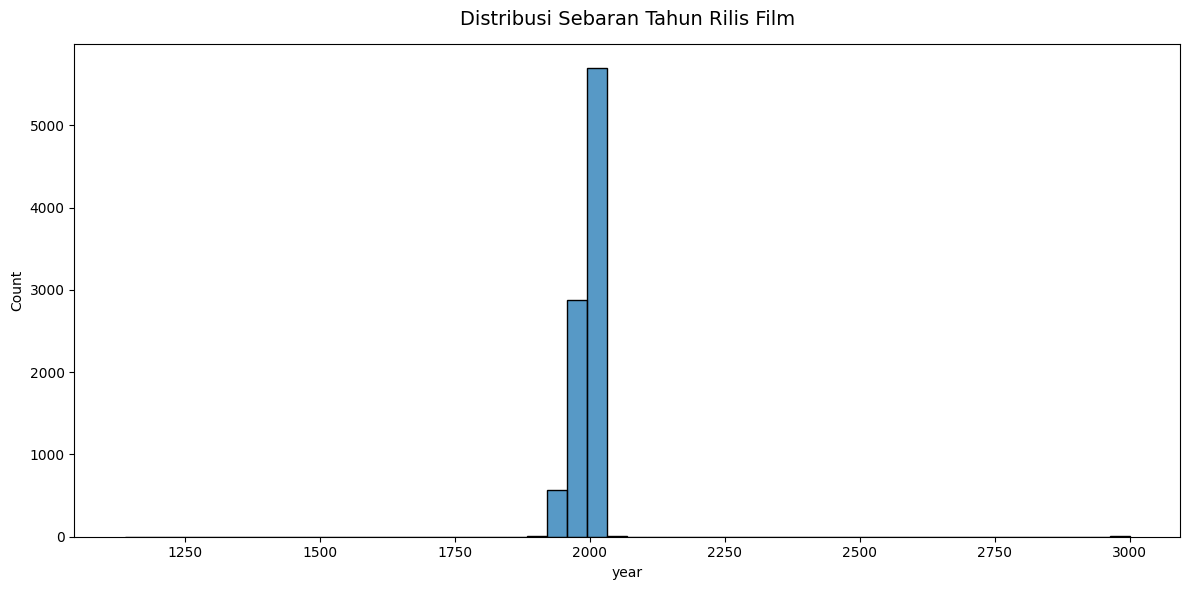

In [16]:
# Melakukan Visualisasi

plt.figure(figsize=(12,6))
sns.histplot(data=new_movies_year, x='year',bins=50)
plt.title('Distribusi Sebaran Tahun Rilis Film', fontsize=14, pad=14)
plt.tight_layout()
plt.show()

Dari hasil visualisasi, terlihat bahwa jumlah film yang paling banyak dirilis terjadi setelah tahun 2000, dan terdapat tren peningkatan dari tahun ke tahun. Temuan ini mengindikasikan bahwa industri film mengalami perkembangan pesat selama dua dekade terakhir, baik dalam hal kuantitas maupun kualitas produksi film.

### Distribution of Film Genres

In [17]:
# Melakukan duplikasi dataframe dfMovies ke movies_genres
movies_genres = dfMovies.copy()

# Melakukan ekstraksi pada genres dengan melakukan split setelah tanda baca "|"
genres=[]
for i in range(len(dfMovies.genres)):
    for x in dfMovies.genres[i].split('|'):
        if x not in genres:
            genres.append(x)
genres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

In [18]:
for x in genres:
    movies_genres[x] = 0

for i in range(len(dfMovies.genres)):
    for x in dfMovies.genres[i].split('|'):
        movies_genres[x][i]=1

movies_genres.head()

,movieId,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


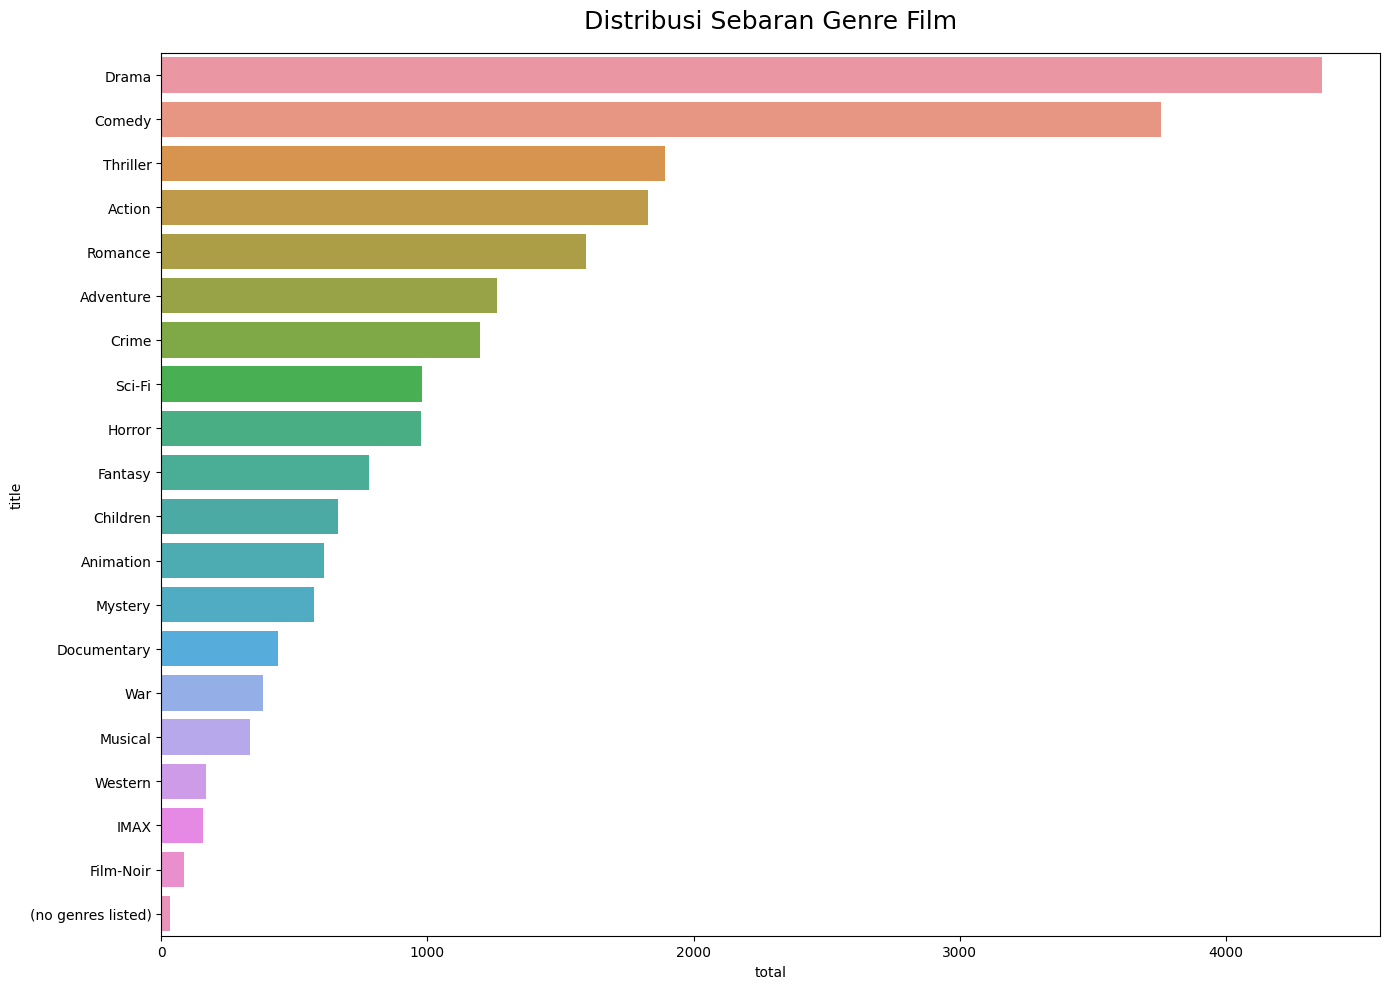

In [19]:
# Visualisasi
data = movies_genres.iloc[:,3:].sum().reset_index()
data.columns = ['title','total']

plt.figure(figsize=(14,10))
sns.barplot(y='title', x='total', data=data.sort_values(by='total', ascending=False))
plt.title('Distribusi Sebaran Genre Film', fontsize=18, pad=18)
plt.tight_layout()
plt.show()

Hasil analisis menunjukkan bahwa genre drama memiliki jumlah film terbanyak, mengindikasikan bahwa genre ini sangat populer dan kemungkinan besar memiliki basis penggemar yang besar. Selain itu, keberadaan yang signifikan dari genre komedi dan thriller juga mengungkapkan bahwa kedua genre ini menikmati popularitas yang kuat di antara penonton. Di sisi lain, adanya genre yang tidak terdefinisi dan film-noir dengan jumlah film yang terbatas menunjukkan bahwa keduanya mungkin termasuk dalam kategori genre yang lebih khusus atau niche yang mungkin tidak menarik perhatian audiens sebanyak genre utama.

### Distribution of Ratings for all films

In [20]:
# menggabungkan dataset ratings dan movies menggunakan fungsi merge
movies_rating = pd.merge(dfRatings, dfMovies, on='movieId', how='inner')
movies_rating.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,2005-01-25 06:52:26,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,2017-11-13 12:59:30,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,2011-05-18 05:28:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


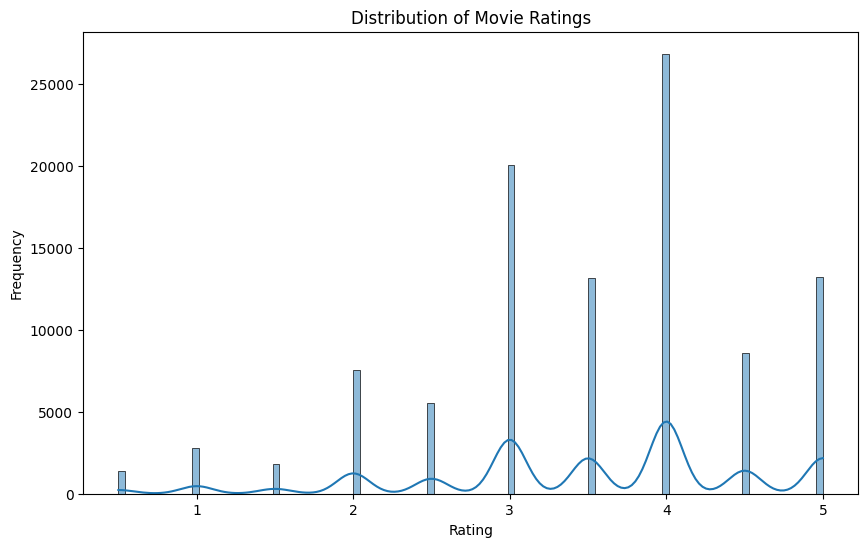

In [21]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.histplot(movies_rating['rating'], kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

Visualisasi di atas memberikan wawasan tentang preferensi penonton terhadap film, dengan rating 4 yang paling sering diberikan. Hal ini mengindikasikan bahwa sebagian besar film dalam dataset mendapatkan penilaian positif dari penonton. Selain itu, rating 3 juga cukup umum, menunjukkan adanya variasi dalam preferensi penonton terhadap film-film tersebut.
Namun, di sisi lain, terlihat bahwa rating 0.5 dan 1.5 jarang diberikan kepada film-film tersebut. Hal ini dapat mengindikasikan bahwa penonton mungkin lebih memilih untuk tidak memberikan penilaian daripada memberikan penilaian negatif yang sangat rendah. Hal ini menunjukkan potensi untuk meningkatkan variasi dalam penilaian film-film tersebut, mungkin dengan mengidentifikasi area yang perlu diperbaiki atau ditingkatkan dalam produksi film.

# Data Preparation

## Handling Missing Value

Tujuan dari mengatasi nilai yang hilang adalah sebagai berikut:
* Memastikan Kualitas Data <br>
  Data yang hilang dapat menyebabkan bias dan menganggu hasil analisis yang akurat
* Menghindari Kesalahan Analisis <br>
  Nilai yang hilang dapat mengakibatkan kesalahan dalam analisis data, seperti perhitungan yang salah atau penarikan kesimpulan yang tidak tepat.

***movies.csv***

In [22]:
# Check missing value
dfMovies.isna().sum()/len(dfMovies)*100

movieId    0.0
title      0.0
genres     0.0
dtype: float64

<Axes: >

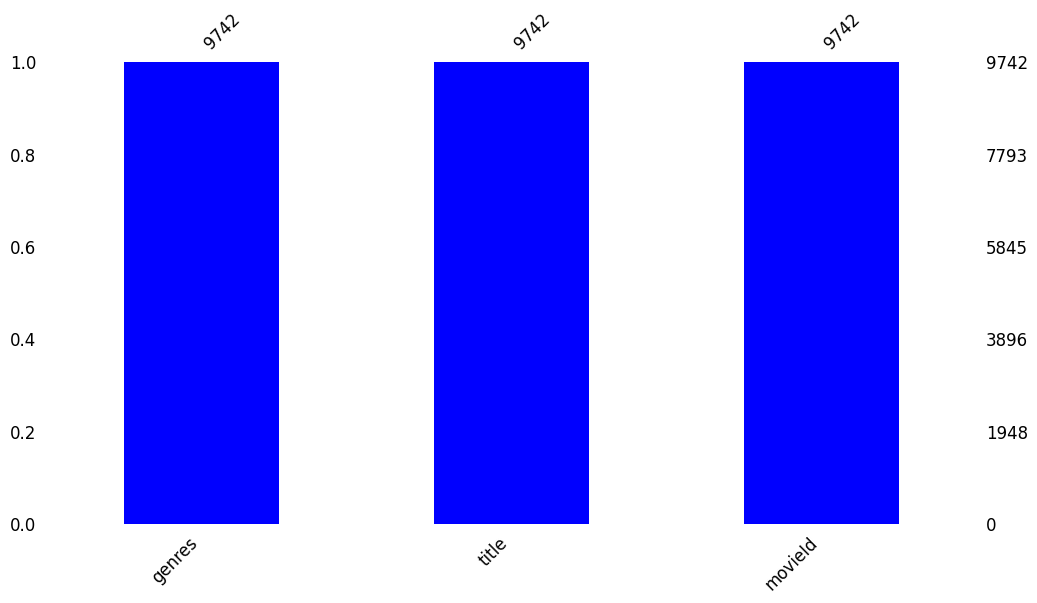

In [23]:
missingno.bar(dfMovies, sort="descending", figsize=(12,6), fontsize=12, color='blue')

Pada dataset *movies.csv* tidak memiliki missing value

***ratings.csv***

In [24]:
# Check missing value
dfRatings.isna().sum()/len(dfRatings)*100

userId       0.0
movieId      0.0
rating       0.0
timestamp    0.0
dtype: float64

<Axes: >

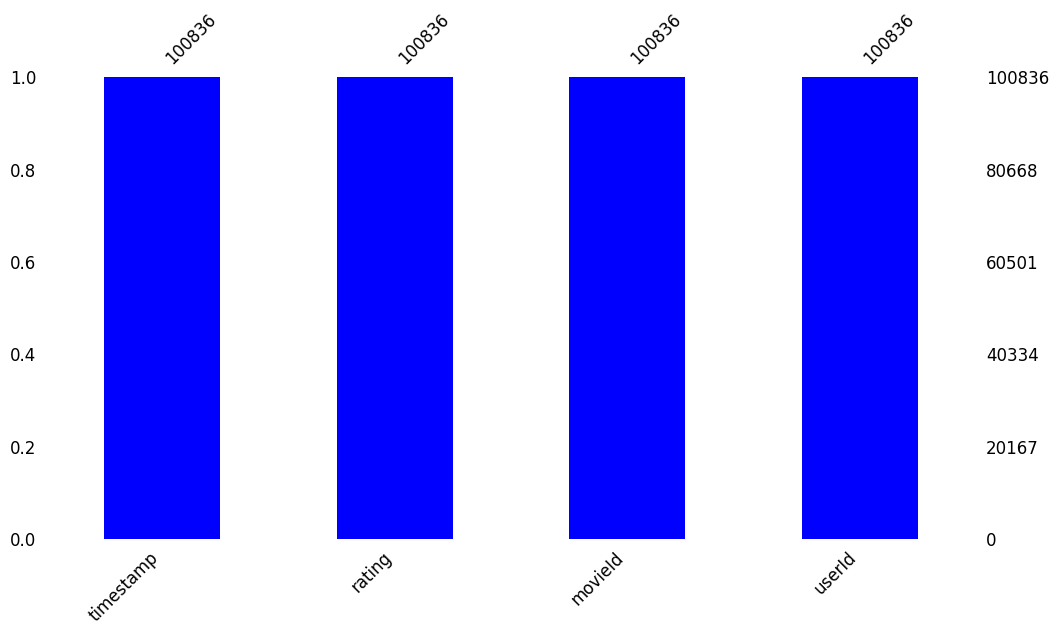

In [25]:
missingno.bar(dfRatings, sort="descending", figsize=(12,6), fontsize=12, color='blue')

Pada dataset *ratings.csv* tidak memiliki missing value

## Handling Duplicate Value

Terdapat beberapa tujuan dari proses ini, yaitu:
* Memastikan kualitas data <br>
  Duplikasi data dapat menyebabkan bias dan mengganggu hasil analisis yang akurat.
* Menghindari Perkiraan Berlebihan <br>
  Jika data ini tidak ditangani, perkiraan atau statistik yang didasarkan pada data tersebut dapat menjadi terlalu berlebihan. Ini dapat menghasilkan evaluasi yang tidak akurat dalam berbagai konteks.

***movies.csv***

In [26]:
# Number of Duplicate Data
dfMovies.duplicated().sum()

0

Tidak ada duplicate value pada kolom movies.

***ratings.csv***

In [27]:
# Number of Duplicate Data
dfRatings.duplicated().sum()

0

Tidak ada duplicate value pada kolom ratings.

## Delete timestamp column

Karena pada analisa model development kita tidak membutuhkan timestamp, maka akan kita hapus saja.

In [28]:
dfRatings.drop('timestamp', axis=1, inplace=True)

dfRatings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


# Model Development

## Content Based Filtering

### TF-IDF Vectorizer

In [29]:
# Inisialisasi TfidfVectorizer
tfid = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tfid.fit(dfMovies['genres'])

# Mapping array dari fitur index integer ke fitur nama
tfid.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

Setelah dilakukan inisiasi TfidVectorizer, perhitungan idf pada data genre dan mapping array selanjutnya adalah melakukan fit dan transformasi ke dalam bentuk matriks

In [30]:
tfidf_matrix = tfid.fit_transform(dfMovies['genres'])
tfidf_matrix.shape

(9742, 24)

Terdapat 9742 data dan 24 kolom kategori

In [31]:
# mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.41684567, 0.51622547, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.51236121, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.57860574, 0.        , 0.81560738, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [32]:
# membuat dataframe untuk melihat tf-idf matrix
# kolom diisi dengan genre
# baris diisi dengan judul film

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfid.get_feature_names_out(),
    index=dfMovies.title
).sample(24, axis=1).sample(10, axis=0)

,horror,western,noir,animation,comedy,mystery,action,children,fi,sci,...,drama,thriller,adventure,musical,imax,genres,documentary,war,crime,no
title,,,,,,,,,,,,,,,,,,,,,
Elite Squad (Tropa de Elite) (2007),0.000000,0.0,0.0,0.000000,0.000000,0.0,0.515078,0.000000,0.000000,0.000000,...,0.347580,0.508246,0.000000,0.0,0.000000,0.0,0.0,0.0,0.596296,0.0
"Stendhal Syndrome, The (Sindrome di Stendhal, La) (1996)",0.629949,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.503790,0.000000,0.0,0.000000,0.0,0.0,0.0,0.591067,0.0
I Walked with a Zombie (1943),0.877354,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.479843,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
Swept Away (2002),0.000000,0.0,0.0,0.000000,0.570915,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
City of Angels (1998),0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.371537,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
"White Balloon, The (Badkonake sefid) (1995)",0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.898163,0.000000,0.000000,...,0.439662,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
"Matrix Revolutions, The (2003)",0.000000,0.0,0.0,0.000000,0.000000,0.0,0.316653,0.000000,0.390456,0.390456,...,0.000000,0.312453,0.360428,0.0,0.606039,0.0,0.0,0.0,0.000000,0.0
Waterworld (1995),0.000000,0.0,0.0,0.000000,0.000000,0.0,0.432883,0.000000,0.533776,0.533776,...,0.000000,0.000000,0.492725,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
Breakfast with Scot (2007),0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.540377,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


### Cosine Similarity

In [33]:
# menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.81357774, 0.15276924, ..., 0.        , 0.4210373 ,
        0.26758648],
       [0.81357774, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15276924, 0.        , 1.        , ..., 0.        , 0.        ,
        0.57091541],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.4210373 , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.26758648, 0.        , 0.57091541, ..., 0.        , 0.        ,
        1.        ]])

In [34]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul film
cosine_sim_df = pd.DataFrame(cosine_sim, index=dfMovies['title'], columns=dfMovies['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap judul film
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9742, 9742)


title,2046 (2004),Webmaster (1998),Jack the Bear (1993),Starman (1984),Joy (2015)
title,,,,,
Disclosure (1994),0.151289,0.000000,0.382993,0.156880,0.382993
Pillow Talk (1959),0.211180,0.000000,0.258514,0.218984,0.258514
Ernest Rides Again (1993),0.000000,0.000000,0.344042,0.000000,0.344042
Miracle Mile (1989),0.851845,0.813031,0.213458,0.883322,0.213458
"Jungle Book 2, The (2003)",0.000000,0.000000,0.000000,0.000000,0.000000
Proof of Life (2000),0.268006,0.000000,0.678466,0.277910,0.678466
Monsieur Ibrahim (Monsieur Ibrahim et les fleurs du Coran) (2003),0.268006,0.000000,0.678466,0.277910,0.678466
When the Levees Broke: A Requiem in Four Acts (2006),0.000000,0.000000,0.000000,0.000000,0.000000
Double Indemnity (1944),0.054744,0.000000,0.138586,0.056767,0.138586


### Mendapatkan Rekomendasi

In [35]:
def MovieRecommendations(movies_title, similarity_data=cosine_sim_df,
                         items=dfMovies[['movieId','title','genres']], k=10):

    # mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # dataframe diubah menjadi numpy
    # Range (start, stop, step)
    index = similarity_data.loc[:, movies_title].to_numpy().argpartition(
        range(-1, -k, -1)
    )

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop movies_title agar judul film yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(movies_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [36]:
find_title = dfMovies[dfMovies['title'] == 'Wild China (2008)']
find_title

,movieId,title,genres
7313,77177,Wild China (2008),Documentary


Dalam contoh di atas, film "Wild China" (2008) termasuk dalam genre Dokumenter. Langkah selanjutnya akan melibatkan pengujian model rekomendasi dengan menggunakan judul film "Wild China" (2008) sebagai subjek uji coba.

In [37]:
movie_title = 'Wild China (2008)'
movie_recomend = MovieRecommendations(movie_title)
movie_recomend

,title,movieId,genres
0,"Most Hated Family in America, The (2007)",71131,Documentary
1,Paradise Lost: The Child Murders at Robin Hood...,1361,Documentary
2,Gonzo: The Life and Work of Dr. Hunter S. Thom...,60291,Documentary
3,"Winged Migration (Peuple migrateur, Le) (2001)",6299,Documentary
4,Promises (2001),5224,Documentary
5,Encounters at the End of the World (2008),60333,Documentary
6,Marwencol (2010),83827,Documentary
7,Stevie (2002),6269,Documentary
8,Outfoxed: Rupert Murdoch's War on Journalism (...,27912,Documentary
9,Grey Gardens (1975),8264,Documentary


Hasil uji coba model rekomendasi telah berhasil menampilkan 10 film dengan genre Dokumenter.

## Collaborative Filtering

### Data Preparation

Pada tahap ini, dilakukan persiapan data untuk menyandikan *(encode)* fitur userId dan movieId ke dalam indeks integer.

In [38]:
# Mengubah userId menjadi list tanpa nilai yang sama
user_id = dfRatings['userId'].unique().tolist()
print(f'list userId: {user_id}')

# Melakukan encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_id)}
print(f'\nencoded userId: {user_to_user_encoded}')

# Melakukan proses encoding angka ke ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_id)}
print(f'\nencoded number to userId: {user_encoded_to_user}')

list userId: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [39]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_id = dfRatings['movieId'].unique().tolist()
print(f'list movieId: {movie_id}')

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_id)}
print(f'\nencoded movieId: {movie_to_movie_encoded}')

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_id)}
print(f'\nencoded number to movieId: {movie_encoded_to_movie}')

list movieId: [1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163, 216, 223, 231, 235, 260, 296, 316, 333, 349, 356, 362, 367, 423, 441, 457, 480, 500, 527, 543, 552, 553, 590, 592, 593, 596, 608, 648, 661, 673, 733, 736, 780, 804, 919, 923, 940, 943, 954, 1009, 1023, 1024, 1025, 1029, 1030, 1031, 1032, 1042, 1049, 1060, 1073, 1080, 1089, 1090, 1092, 1097, 1127, 1136, 1196, 1197, 1198, 1206, 1208, 1210, 1213, 1214, 1219, 1220, 1222, 1224, 1226, 1240, 1256, 1258, 1265, 1270, 1275, 1278, 1282, 1291, 1298, 1348, 1377, 1396, 1408, 1445, 1473, 1500, 1517, 1552, 1573, 1580, 1587, 1617, 1620, 1625, 1644, 1676, 1732, 1777, 1793, 1804, 1805, 1920, 1927, 1954, 1967, 2000, 2005, 2012, 2018, 2028, 2033, 2046, 2048, 2054, 2058, 2078, 2090, 2093, 2094, 2096, 2099, 2105, 2115, 2116, 2137, 2139, 2141, 2143, 2161, 2174, 2193, 2253, 2268, 2273, 2291, 2329, 2338, 2353, 2366, 2387, 2389, 2395, 2406, 2414, 2427, 2450, 2459, 2470, 2478, 2492, 2502, 2528, 2529, 2542, 2571, 2580, 2596, 2616, 2617, 2628, 2640, 2641,

In [40]:
# Mapping userId ke dataframe user
dfRatings['user'] = dfRatings['userId'].map(user_to_user_encoded)

# Mapping placeID ke dataframe resto
dfRatings['movie'] = dfRatings['movieId'].map(movie_to_movie_encoded)

dfRatings.head()

,userId,movieId,rating,user,movie
0,1,1,4.0,0,0
1,1,3,4.0,0,1
2,1,6,4.0,0,2
3,1,47,5.0,0,3
4,1,50,5.0,0,4


In [41]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)

# Mendapatkan jumlah resto
num_movie = len(movie_encoded_to_movie)

# Mengubah rating menjadi nilai float
dfRatings['rating'] = dfRatings['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(dfRatings['rating'])

# Nilai maksimal rating
max_rating = max(dfRatings['rating'])

print(f'Number of User: {num_users}')
print(f'Number of Movie: {num_movie}')
print(f'Min rating: {min_rating}')
print(f'Max rating: {max_rating}')

Number of User: 610
Number of Movie: 9724
Min rating: 0.5
Max rating: 5.0


### Membagi Data untuk Training dan Validasi

Langkah pertama yang akan dilakukan untuk membagi data training dan validasi adalah **mengacak dataset**

In [42]:
# mengacak dataset
dfRatings = dfRatings.sample(frac=1, random_state=42)
dfRatings

,userId,movieId,rating,user,movie
67037,432,77866,4.5,431,4730
42175,288,474,3.0,287,474
93850,599,4351,3.0,598,2631
6187,42,2987,4.0,41,194
12229,75,1610,4.0,74,727
...,...,...,...,...,...
6265,42,4005,4.0,41,1873
54886,364,141,4.0,363,524
76820,480,6867,4.0,479,2240
860,6,981,3.0,5,712


Kemudian, langkah selanjutnya adalah **membuat variable training dan validasi**

In [43]:
# Membuat variable x untuk mencocokan data user dan movie menjadi satu value
x = dfRatings[['user', 'movie']].values

# membuat variable y untuk membuat rating dari hasil
y = dfRatings['rating'].apply(lambda x: (x-min_rating) / (max_rating - min_rating)).values

# membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * dfRatings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


Pada langkah diatas, kita membagi dataset menjadi 80% data training dan 20% data validasi. Tujuannya sebagai berikut:
- Evaluasi Kinerja Model, set validasi digunakan untuk mengukur kinerja model rekomendasi selama pelatihan.
- Penyesuaian Hyperparameter, set validasi juga digunakan untuk menyesuaikan hyperparameter model, seperti tingkat pembelajaran atau jumlah epoch dalam pelatihan.
- Mencegah Overfitting, set pelatihan digunakan untuk melatih model, sedangkan set validasi digunakan untuk mengukur kinerja model saat pelatihan berlangsung. Dengan memisahkan dataset ini, dapat melakukan pengawasan apakah data mulai overfitting pada data pelatihan

### Training

In [44]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(5e-7)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings resto
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(5e-7)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding resto bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [45]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

callbacks = EarlyStopping(
    monitor='val_loss', # parameter yang dipantau
    patience=5, # jumlah epoch (iterasi) yang harus dilewati tanpa adanya perbaikan dalam metrik pemantauan sebelum early stopping menghentikan pelatihan
    mode='min', # mengindikasikan apakah kita ingin meminimalkan atau memaksimalkan metrik pemantauan.
    verbose=1 # tingkat detail pesan yang akan ditampilkan selama proses pelatihan
)

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation.

In [46]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks=[callbacks]
)

# Menambahkan keterangan tentang kondisi berhenti
if callbacks.stopped_epoch > 0:
    print(f"Model berhenti setelah epoch ke-{callbacks.stopped_epoch} karena tidak ada perbaikan dalam val_loss.")
else:
    print("Model telah melatih selesai selama semua epoch yang ditentukan.")

Epoch 1/100
10084/10084 [==============================] - 96s 9ms/step - loss: 0.6267 - root_mean_squared_error: 0.2226 - val_loss: 0.6120 - val_root_mean_squared_error: 0.2059
Epoch 2/100
10084/10084 [==============================] - 95s 9ms/step - loss: 0.6045 - root_mean_squared_error: 0.1987 - val_loss: 0.6080 - val_root_mean_squared_error: 0.2014
Epoch 3/100
10084/10084 [==============================] - 90s 9ms/step - loss: 0.5995 - root_mean_squared_error: 0.1930 - val_loss: 0.6074 - val_root_mean_squared_error: 0.2006
Epoch 4/100
10084/10084 [==============================] - 93s 9ms/step - loss: 0.5971 - root_mean_squared_error: 0.1901 - val_loss: 0.6067 - val_root_mean_squared_error: 0.1998
Epoch 5/100
10084/10084 [==============================] - 92s 9ms/step - loss: 0.5951 - root_mean_squared_error: 0.1878 - val_loss: 0.6064 - val_root_mean_squared_error: 0.1993
Epoch 6/100
10084/10084 [==============================] - 93s 9ms/step - loss: 0.5942 - root_mean_squared_err

### Uji Coba Model Collaborative Filtering

In [47]:
# mengambil sample user
user_ID = dfRatings.userId.sample(1).iloc[0]
movie_watched_by_user = dfRatings[dfRatings.userId == user_ID]

movie_not_watched = dfMovies[~dfMovies['movieId'].isin(movie_watched_by_user.movieId.values)]['movieId']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_ID)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)


In [48]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_ID))
print('====' * 10)
print('movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = dfMovies[dfMovies['movieId'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title)

print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = dfMovies[dfMovies['movieId'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title)

282/282 [==============================] - 1s 2ms/step
Showing recommendations for users: 105
movie with high ratings from user
--------------------------------
Clockwork Orange, A (1971)
K-PAX (2001)
Prestige, The (2006)
Her (2013)
Radio Day (2008)
--------------------------------
Top 10 movie recommendation
--------------------------------
Glengarry Glen Ross (1992)
Rebel Without a Cause (1955)
Streetcar Named Desire, A (1951)
Sweet Hereafter, The (1997)
Gladiator (1992)
Neon Genesis Evangelion: The End of Evangelion (Shin seiki Evangelion Gekijô-ban: Air/Magokoro wo, kimi ni) (1997)
Memories of Murder (Salinui chueok) (2003)
Sophie Scholl: The Final Days (Sophie Scholl - Die letzten Tage) (2005)
Inside Job (2010)
Three Billboards Outside Ebbing, Missouri (2017)


# Evaluation

Evaluasi yang akan saya lakukan di sini melibatkan penggunaan Root Mean Squared Error (RMSE) untuk Collaborative Filtering serta mengukur Precision untuk Content-Based Filtering.

## Precision Content Based Filtering

In [49]:
find_title = dfMovies[dfMovies['title'] == 'Grumpier Old Men (1995)']
find_title

,movieId,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance


Dapat dilihat dari data di atas bahwa film dengan judul "Grumpier Old Men (1995)" memiliki dua genre, yaitu comedy dan romance. Oleh karena itu, rekomendasi film seharusnya mencakup kedua genre tersebut.

In [50]:
movie_title = 'Grumpier Old Men (1995)'
movie_recomend = MovieRecommendations(movie_title)
movie_recomend

,title,movieId,genres
0,Monsoon Wedding (2001),5135,Comedy|Romance
1,What Women Want (2000),4018,Comedy|Romance
2,"Anarchist Cookbook, The (2002)",6551,Comedy|Romance
3,Date Movie (2006),43919,Comedy|Romance
4,Sixteen Candles (1984),2144,Comedy|Romance
5,Just My Luck (2006),43930,Comedy|Romance
6,At Middleton (2013),111680,Comedy|Romance
7,"Walk, Don't Run (1966)",6407,Comedy|Romance
8,Failure to Launch (2006),44004,Comedy|Romance
9,Mr. Baseball (1992),6523,Comedy|Romance


Dari hasil rekomendasi di atas, terlihat bahwa film "Grumpier Old Men (1995)" memiliki dua genre. Seluruh film yang direkomendasikan juga memiliki genre yang sama. Hal ini mengindikasikan bahwa precision sistem kita adalah 10/10 atau setara dengan 100%.

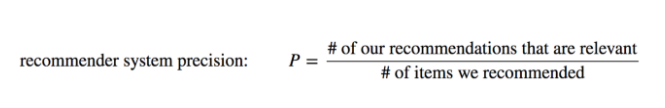

Precision = 10/10 = 100%

## Root Mean Square Error Plot

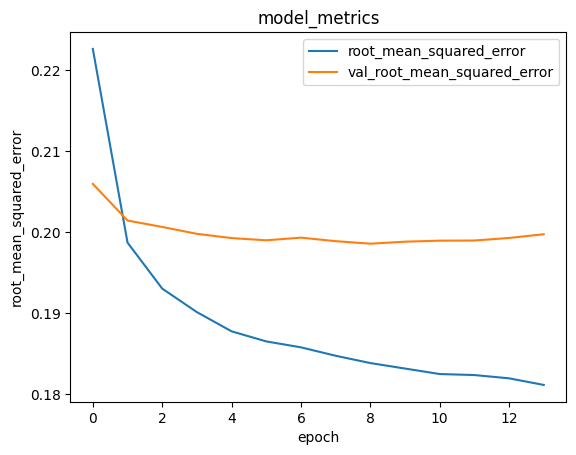

In [51]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['root_mean_squared_error', 'val_root_mean_squared_error'])
plt.show()

Perubahan *Root Mean Squared Error (RMSE)* selama proses pelatihan merupakan indikator penting dalam mengukur kualitas model. Pada awal pelatihan, terlihat RMSE yang cukup tinggi pada data pelatihan dan data validasi, mengindikasikan bahwa model belum sepenuhnya terlatih dan prediksinya kurang akurat. Namun, melalui beberapa *epoch* berikutnya, terjadi perbaikan yang signifikan, ini menunjukkan bahwa model mulai memahami pola-pola dalam data. Meskipun penurunan RMSE berlanjut namun pada epoch 11 hingga 13, *RMSE* pada data validasi tidak mengalami peningkatan yang signifikan. Hal ini mengindikasikan bahwa model mungkin telah mencapai kinerja terbaiknya untuk data validasi yang tersedia, dan pelatihan lebih lanjut tidak memberikan manfaat yang signifikan. Selain itu, ada kemungkinan model mulai overfitting pada data pelatihan, yaitu menjadi terlalu khusus untuk data tersebut dan sulit untuk menggeneraslisasi prediksi pada data yang belum pernah dilihat sebelumnya.